In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd   
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
## Data import

headerList = ['Fixed Acidity','Volatile Acidity','Citric Acid','Residual Sugar','Chlorides','Free Sulfur Dioxide','Total Sulfur Dioxide','Density','pH','Sulphates','Alcohol','Quality']
redWine = pd.read_csv('winequality-red.csv',header = 0, names = headerList,sep=";")

redWine 
redWine.shape
redWine.describe()
redWine.corr()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
Fixed Acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Volatile Acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Citric Acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Residual Sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Free Sulfur Dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Total Sulfur Dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Data Cleaning

In [3]:
#Replace the NAN with 0
redWine.fillna(0, inplace = True)
redWine.isnull().sum()
redWine.isnull().any()

Fixed Acidity           False
Volatile Acidity        False
Citric Acid             False
Residual Sugar          False
Chlorides               False
Free Sulfur Dioxide     False
Total Sulfur Dioxide    False
Density                 False
pH                      False
Sulphates               False
Alcohol                 False
Quality                 False
dtype: bool

From here, we can see that 3 and 8 could be noise in the dataset. In the data cleaning process, we can delete those noise in order to get a better model

In [4]:
redWine['Quality'].value_counts()
# redWine.drop(index = (redWine.loc[(redWine['Quality'] == 3)].index),inplace = True)
# redWine.drop(index = (redWine.loc[(redWine['Quality'] == 8)].index),inplace = True)
# redWine['Quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Quality, dtype: int64

## Standardlized

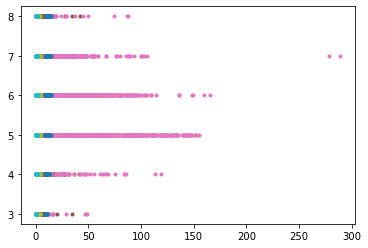

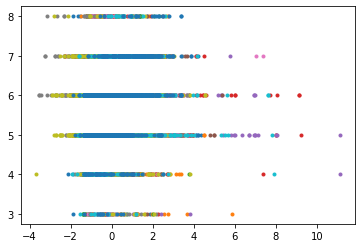

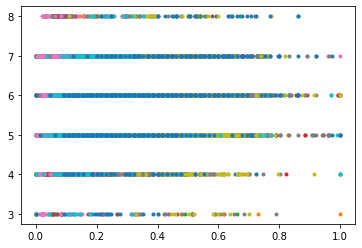

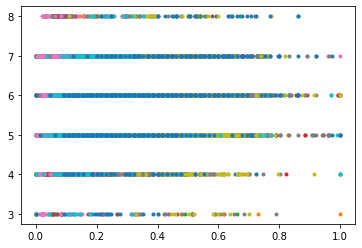

In [11]:
# split data to X and y and standardscaler
X = redWine.drop(['Quality'], axis = 1)
X_std = StandardScaler().fit_transform(redWine.drop(['Quality'], axis = 1))
y = redWine['Quality']
X_min_max = MinMaxScaler().fit_transform(redWine.drop(['Quality'], axis = 1))

X_min_max_X_std = MinMaxScaler().fit_transform(X_std)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

plt.plot(X,y,'.')
plt.show()
plt.plot(X_std,y,'.')
plt.show()
plt.plot(X_min_max,y,'.')
plt.show()
plt.plot(X_min_max_X_std,y,'.')

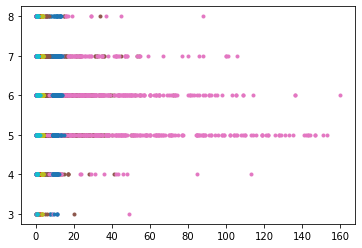

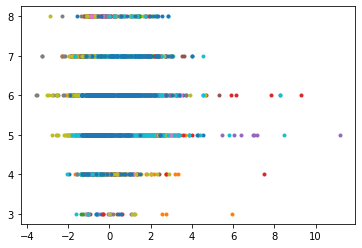

In [6]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(X_train)
x_test = scale.transform(X_test)
plt.plot(X_test,y_test,'.')
plt.show()
plt.plot(x_test,y_test,'.')

In [7]:
# KNN
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 30, weights = 'distance')
classifier_knn.fit(X_train,y_train)
pred_knn = classifier_knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        20
           5       0.62      0.70      0.66       221
           6       0.53      0.65      0.58       204
           7       0.70      0.28      0.40        69
           8       0.00      0.00      0.00        11

    accuracy                           0.58       528
   macro avg       0.31      0.27      0.27       528
weighted avg       0.55      0.58      0.55       528



/Users/willspro/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=200, max_depth=100,  max_features='sqrt')
classifier_rf.fit(X_train, y_train)
pred_rf = classifier_rf.predict(X_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        20
           5       0.74      0.82      0.78       221
           6       0.63      0.70      0.66       204
           7       0.56      0.43      0.49        69
           8       0.00      0.00      0.00        11

    accuracy                           0.67       528
   macro avg       0.32      0.33      0.32       528
weighted avg       0.62      0.67      0.64       528



/Users/willspro/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
#ANN
from sklearn.neural_network import MLPClassifier
classifier_ann = MLPClassifier(solver='lbfgs', activation='relu', hidden_layer_sizes = 700)
classifier_ann.fit(X_train, y_train)
pred_ann = classifier_ann.predict(X_test)
print(classification_report(y_test, pred_ann))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        20
           5       0.65      0.71      0.68       221
           6       0.51      0.60      0.55       204
           7       0.45      0.29      0.35        69
           8       0.00      0.00      0.00        11

    accuracy                           0.57       528
   macro avg       0.27      0.27      0.26       528
weighted avg       0.53      0.57      0.54       528



/Users/willspro/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/willspro/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
